Домашнее задание:

Используя файл Lesson_8_extended.ipynb (он в web8.zip в материалах):

Обучить любую модель классификации на датасете IRIS до применения PCA (2 компоненты) и после него. Сравнить качество классификации по отложенной выборке.

*Написать свою реализацию метода главных компонент с помощью сингулярного разложения с использованием функции numpy.linalg.svd()

In [36]:
import numpy as np
from sklearn import datasets
import matplotlib.pyplot as plt

from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

In [37]:
# Загрузим игрушечный датасет из sklearn
iris = datasets.load_iris()
X = iris.data
y = iris.target
X.shape

(150, 4)

In [38]:
y.shape

(150,)

In [39]:
X.dtype

dtype('float64')

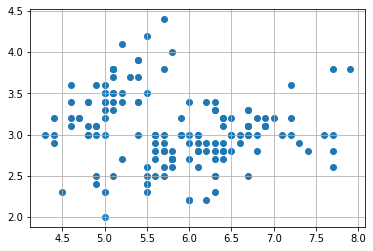

In [40]:
plt.scatter(X[:, 0], X[:, 1])
plt.grid()

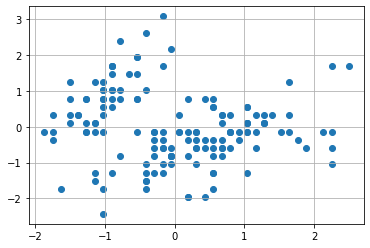

In [41]:
# Для начала отмасштабируем выборку
# X_ = X.astype(float)
# rows, cols = X.shape

def standard_scale(x):
    res = (x - x.mean(axis=0)) / x.std(axis=0)
    return res

X = standard_scale(X)
plt.scatter(X[:, 0], X[:, 1])
plt.grid()

In [55]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)
# X_train, X_test, y_train, y_test = train_test_split(X_, y, test_size=0.25, random_state=42)

In [56]:
#используем алгоритм к-ближайших соседей
clf = KNeighborsClassifier(n_neighbors=5)
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)
print(f'Доля правильных ответов без применения PCA на отложенной выборке: {accuracy_score(y_test, y_pred)}')

Доля правильных ответов без применения PCA на отложенной выборке: 1.0


In [44]:
# Найдем собственные векторы и собственные значения
 
covariance_matrix = X.T @ X

eig_values, eig_vectors = np.linalg.eig(covariance_matrix)

# сформируем список кортежей (собственное значение, собственный вектор)
eig_pairs = [(np.abs(eig_values[i]), eig_vectors[:, i]) for i in range(len(eig_values))]

# и отсортируем список по убыванию собственных значений
eig_pairs.sort(key=lambda x: x[0], reverse=True)

print('Собственные значения и собственные векторы в порядке убывания:')
for i in eig_pairs:
    print(i)

Собственные значения и собственные векторы в порядке убывания:
(437.77467247979905, array([ 0.52106591, -0.26934744,  0.5804131 ,  0.56485654]))
(137.10457072021057, array([-0.37741762, -0.92329566, -0.02449161, -0.06694199]))
(22.013531335697206, array([-0.71956635,  0.24438178,  0.14212637,  0.63427274]))
(3.1072254642929558, array([ 0.26128628, -0.12350962, -0.80144925,  0.52359713]))


In [45]:
eig_sum = sum(eig_values)
var_exp = [(i / eig_sum) * 100 for i in sorted(eig_values, reverse=True)]
cum_var_exp = np.cumsum(var_exp)
print(f'Доля дисперсии, описываемая каждой из компонент \n{var_exp}')

# а теперь оценим кумулятивную (то есть накапливаемую) дисперсию при учитывании каждой из компонент
print(f'Кумулятивная доля дисперсии по компонентам \n{cum_var_exp}')

Доля дисперсии, описываемая каждой из компонент 
[72.96244541329987, 22.850761786701774, 3.6689218892828697, 0.517870910715493]
Кумулятивная доля дисперсии по компонентам 
[ 72.96244541  95.8132072   99.48212909 100.        ]


In [46]:
# Сформируем вектор весов из собственных векторов, соответствующих первым двум главным компонентам
W = np.hstack([eig_pairs[i][1].reshape(4,1) for i in range(2)])

print(f'Матрица весов W:\n', W)

Матрица весов W:
 [[ 0.52106591 -0.37741762]
 [-0.26934744 -0.92329566]
 [ 0.5804131  -0.02449161]
 [ 0.56485654 -0.06694199]]


In [47]:
# Сформируем новую матрицу "объекты-признаки"
Z = X.dot(W)
Z[:10]

array([[-2.26470281, -0.4800266 ],
       [-2.08096115,  0.67413356],
       [-2.36422905,  0.34190802],
       [-2.29938422,  0.59739451],
       [-2.38984217, -0.64683538],
       [-2.07563095, -1.48917752],
       [-2.44402884, -0.0476442 ],
       [-2.23284716, -0.22314807],
       [-2.33464048,  1.11532768],
       [-2.18432817,  0.46901356]])

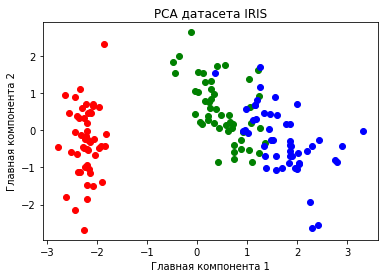

In [48]:
plt.figure()
y = iris.target
for c, i in zip("rgb", [0, 1, 2]):
    plt.scatter(Z[y == i, 0], Z[y == i, 1], c=c)
plt.xlabel('Главная компонента 1')
plt.ylabel('Главная компонента 2')
plt.title('PCA датасета IRIS')
plt.show()

In [49]:
Z_train, Z_test, y_train, y_test = train_test_split(Z, y, test_size=0.25, random_state=42)

In [50]:
#используем алгоритм к-ближайших соседей
clf = KNeighborsClassifier(n_neighbors=3)
clf.fit(Z_train, y_train)
y_pred = clf.predict(Z_test)
print(f'Доля правильных ответов после применения PCA на отложенной выборке: {accuracy_score(y_test, y_pred)}')

Доля правильных ответов после применения PCA на отложенной выборке: 0.9473684210526315


Почему то качество классификации ухудшилось.

In [57]:
import platform
platform.platform()

'Windows-10-10.0.19041-SP0'

In [58]:
import sys
sys.version

'3.9.1 (tags/v3.9.1:1e5d33e, Dec  7 2020, 17:08:21) [MSC v.1927 64 bit (AMD64)]'